# Python for Scientific Computing

Preamble: Run the cells below to import the necessary Python packages

*This notebook created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.*

## Imports and preamble

These are external libraries, including your own code stored in separate .py files, that you want to import in order to run the notebook. Since our notebook environment is running in Python, we don't need to import the language itself.

 However, it's worth checking that you are using the right version of Python (usually Python 3)

 For larger projects, you will want to use separate virtual environments for different projects. It's a good idea to double check your environment

In [3]:
# pre-installed library containing a grab bag of system functions
import sys
print(sys.version)

# Import some local code, which I'll use behind the scenes
# from ../resources import helper_functions

# Wipe all outputs from this notebook
from IPython.display import Image, clear_output
clear_output(True)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
%matplotlib inline


# Why Python?

+ Interpreted language
+ Extensible, plenty of external modules that can be imported

Other good options for computational physics

+ C/C++
+ Mathematica

Keeping an eye on

+ Julia
+ Rust
+ Haskell

Specialized

+ R
+ MATLAB
+ Perl





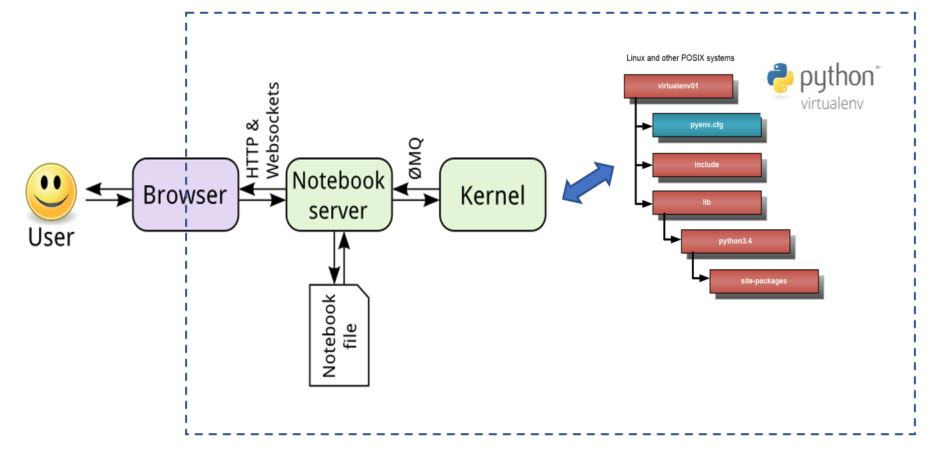

In [23]:
Image("../resources/jupyterkernels.jpg")
# Source: https://anchormen.nl/blog/big-data-services/pyspark-jupyter-kernels/

# Python basic syntax

+ See resources on syllabus for more info on Python
+ We'll focus on "sharp edges" and unique features of the language here

In [3]:
## Assigning variables, pass by value for immutable types

a = 1
b = 2
print(a, b)

temp = a
a = b
b = temp
print(a, b)

a, b = b, a
print(a, b)

1 2
2 1
1 2


# Python data types

+ Everything in Python is an object. Given a variable, how do we know what it is and what it can do?
+ There are three functions that you can call to get information about an object: `type()`, `dir()`, and `help()`

In [4]:
# Getting help with an unknown python object

# Check what a variable actually is
a = 1
print(type(a))

b = "Kolmogorov"
print(type(b))

# Get help with a variable
help(a)

# List all of the functions/properties of a variable
dir(a)

<class 'int'>
<class 'str'>
Help on int object:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Built-in subclasses:
 |      bool
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |    

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'as_integer_ratio',
 'bit_count',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 '

# Built-in data types

+ Given information: detector counts, velocities, temperatures, how do we store it and access it? Either for data analysis or within a simulation.
+ Because Python is object-oriented, we will eventually build more esoteric objects by composing built-in data structures
+ In scientific computing: lists, numpy arrays, dicts, and strings are the most common datatypes (lists, strings, and dicts are native). 


In [20]:
a = 1.0
print(type(a))

a = 1
print(type(a))

a = "1"
print(type(a))
print("Strings are immutable and ordered\n")

a = (1, 2, 3)
print(type(a))
print("Tuples are immutable and ordered\n")

a = {1, 2, 3}
print(type(a))
print("Sets are mutable and unordered\n")

a = [1, 2, 3, 5, 5, 9]
print(type(a))
print("Lists are mutable and ordered\n")

a = dict()
a["property"] = 27
a["dog"] = "cat"


print(type(a))
print(a)
print("Dictionaries are mutable and unordered")
print("Dictionaries are indexed by keys")
print("Keys must be immutable")

<class 'float'>
<class 'int'>
<class 'str'>
Strings are immutable and ordered

<class 'tuple'>
Tuples are immutable and ordered

<class 'set'>
Sets are mutable and unordered

<class 'list'>
Lists are mutable and ordered

<class 'dict'>
{'property': 27, 'dog': 'cat'}
Dictionaries are mutable and unordered
Dictionaries are indexed by keys
Keys must be immutable


## Lists are ordered sets of objects

+ Can mix different types
+ Every object is stored, along with an index
+ Lists can contain duplicate entries
+ Similar to stacks in other languages

In [10]:
xs = [0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9]
print(xs)

## Find length of the list
print(len(xs))

## Add element to back
xs.append(11)
print(xs)

## Count number of occurrences of a value
xs.count(6)
print(xs)

xs.insert(7, 8.5)
print(xs)

# In-place sort
xs.sort() # alternative: sorted(xs) returns a sorted copy
# xs = sorted(xs)
print(xs)

# Remove element based on value
xs.remove(8)
print(xs)


## Remove element from back and return it
## Similar to a stack in other languages
print(xs.pop()) 
print(xs)



[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9]
11
[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 12, 8.5, 6, 7, 8, 9, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 8.5, 9, 11, 12]


In [11]:
## Slice notation

a = [10, 1, 20, 3, 4, 5, 6, 7, 8, 9]

# slicing up lists:
print("\n", "Slicing syntax.")
print(a[0]) # zero-indexed
print(a[2:5]) # returns neq list [a[2], a[3]] (it doesn't include a[4])
print(a[2:])  # this notation starts with a[2] and goes to the end
print(a[:4])  # this starts at the beginning and goes up until a[3]
print(a[:])   # this just returns a copy of the whole list

# # print("\n", "Negative indices count from the end.")
print(a[-1])    # last element
print(a[:-1])   # this goes up until the last element
print(a[-3:])   # this goes from the third-to-last element to the end




 Slicing syntax.
10
[20, 3, 4]
[20, 3, 4, 5, 6, 7, 8, 9]
[10, 1, 20, 3]
[10, 1, 20, 3, 4, 5, 6, 7, 8, 9]
9
[10, 1, 20, 3, 4, 5, 6, 7, 8]
[7, 8, 9]


## List comprehensions

In [23]:
# Standard loop
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
    a[i] = a[i] ** 2
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [24]:
# List comprehension; Notice how python does exponentiation
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [i ** 2 for i in a]
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [25]:
# List comprehension with conditionals
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [i ** 2 for i in a if i % 2 == 0]
print(a)

[0, 4, 16, 36, 64]


In [26]:
# Map
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = list(map(lambda x: x ** 2, a))
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [27]:
# Map with filter
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = list(map(
    lambda x: x ** 2,
    filter(lambda x: x % 2 == 0, a)
))
print(a)

[0, 4, 16, 36, 64]


# Pass by reference vs. pass by value


In [14]:
# Pass by value
a = [1, 2, 3]
b = a[0]
print(a, b)

a[0] = 9
print(a, b)

b = 9
print(a, b)

[1, 2, 3] 1
[9, 2, 3] 1
[9, 2, 3] 9


In [17]:
# Pass by reference. Python lists are mutable
a = [1, 2, 3]
b = a
print(a, b)

a[0] = 9
print(a, b)

a = [1, 2, 3]
b = a.copy()
a[0] = 9
print(a, b)

[1, 2, 3] [1, 2, 3]
[9, 2, 3] [9, 2, 3]
[9, 2, 3] [1, 2, 3]


In [40]:
# Pass by reference matters with weird objects we don't know about, which are usually
# mutable

class SomeWeirdObject:
    def __init__(self):
        self.some_weird_property = "some value"

a = SomeWeirdObject()
print(a.some_weird_property)

b = a
b.some_weird_property = "some other value"
print(a.some_weird_property)


some value
some other value


# Abstract data types


Abstract data types (how Python built-ins operate behind the scenes)

+ Hash tables
+ Linked Lists
+ Stacks
+ Queues
+ Heaps / Priority Queues
+ Trees

Each structure represents a different abstract way that data is represented and stored. Each has different costs to read, write, search, etc for value. 

Data type of choice depends on
1. Intrinsic structure of data. For example, spatial coordinates are ordered, making a lists a good choice
2. Whether you are reading or writing to structure more often
3. Whether memory or clock speed are your limiting variables

Next week: Runtime and space complexity and Big-O notation; how does the runtime and space usage of different datatypes, and operations acting on them, change with the size of their input $N$

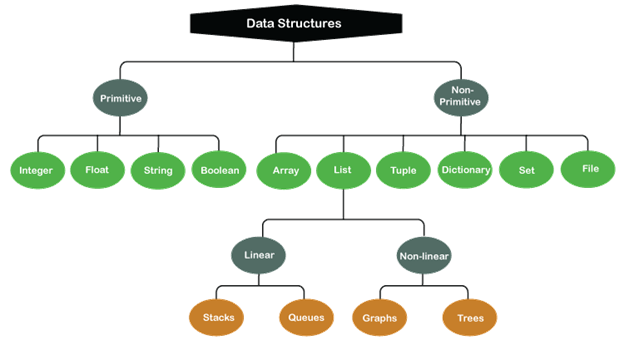

In [277]:
Image("../resources/datatypes.png")
# Source: https://www.tutorialandexample.com/python-data-structures

# Printing and strings

(Skip this in class)

In [18]:
# print statement

print("Hello world")

print("Hello", "world")

msg = "Hello"
msg += " world"
print(msg)

msg = " ".join(["Hello", "world"])
print(msg)

a = 7
print(f"Hello World o{a}")


Hello world
Hello world
Hello world
Hello world
Hello World o7


In [61]:
## During a long computation, you can force Python to print out the progress of the computation

import time

print("Begin long computation without flushing")
for i in range(100):
    time.sleep(0.05)
    if i == 0:
        print("40 iterations complete")

print("Begin long computation with flushing")
for i in range(100):
    time.sleep(0.05)
    if i == 4:
        print("40 iterations complete", flush=True)


Begin long computation without flushing
40 iterations complete
Begin long computation with flushing
40 iterations complete
